In [163]:
import sys
#sys.modules.pop('CLASS_BABY')
#sys.modules.pop('CLASS_SAMPLE')

from CLASS_BABY import *
from CLASS_SAMPLE import *

import scipy.stats as ss

#bigger fonts
import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
matplotlib.rcParams.update({'font.size': 20})

In [164]:
b = baby('FMC003')

In [165]:
# Not specified types are strings
#T = pd.read_csv('../TOST_data/average_properties.txt',
#            sep='\t',index_col=0,na_values=-99,
#            dtype={'WEIGHT_GRAMS': float,
#                   'GEST_AGE_DAYS':float,
#                   'DELTA_SEC_MEASURE':float,
#                   'MED_SPO2':float,
#                   'MED_PI':float,
#                   'MED_PR':float,
#                   'BRADY_SEC_PR':float,
#                   'BRADY_RATIO_PR':float,
#                   'BRADY_RATIO_PR_m10':float,
#                   'BRADY_RATIO_PR_m20':float,
#                   'BRADY_RATIO_PR_m30':float,
#                   'BRADY_RATIO_PR_m40':float,
#                   'BRADY_SEC_SPO2':float,
#                   'BRADY_RATIO_SPO2':float,
#                   'BRADY_SEC_PR_DYN':float,
#                   'BRADY_RATIO_PR_DYN':float})
T = pd.read_csv('../TOST_data/average_properties.txt',sep='\t',index_col=0,na_values=-99)

In [166]:
T.columns.values

array(['BABY_IDS', 'GENDER', 'ETHNICITY', 'WEIGHT_GRAMS', 'GEST_AGE_DAYS',
       'DELIVERY', 'BIRTH_DATE', 'FILE', 'DELTA_SEC_MEASURE', 'MED_SPO2',
       'MED_PR', 'MED_PI', 'MEAN_SPO2', 'MEAN_PR', 'MEAN_PI', 'STD_SPO2',
       'STD_PR', 'STD_PI', 'PHN', 'WRIST', 'FOOT', 'BRADY_SEC_PR',
       'BRADY_RATIO_PR', 'BRADY_RATIO_PR_m10', 'BRADY_RATIO_PR_m20',
       'BRADY_RATIO_PR_m30', 'BRADY_RATIO_PR_m40', 'BRADY_SEC_SPO2',
       'BRADY_RATIO_SPO2', 'BRADY_SEC_PR_DYN', 'BRADY_RATIO_PR_DYN',
       'BRADY_NUM_PER_HOUR_PR', 'BRADY_NUM_PER_HOUR_PR_m10',
       'BRADY_NUM_PER_HOUR_PR_m20', 'BRADY_NUM_PER_HOUR_PR_m30',
       'BRADY_NUM_PER_HOUR_PR_m40', 'BRADY_NUM_PER_HOUR_PR_dyn',
       'BRADY_NUM_PER_HOUR_PR_anytime',
       'BRADY_NUM_PER_HOUR_PR_m10_anytime',
       'BRADY_NUM_PER_HOUR_PR_m20_anytime',
       'BRADY_NUM_PER_HOUR_PR_m30_anytime',
       'BRADY_NUM_PER_HOUR_PR_m40_anytime',
       'BRADY_NUM_PER_HOUR_PR_dyn_anytime', 'BRADY_DURATION_MEDIAN_PR',
       'BRADY_DURATION_M

In [61]:
single=(T['WRIST']==True)&(T['PHN']==False)

In [62]:
v1 = (np.unique(T[single]['BABY_IDS']))

In [63]:
v2 = (np.unique(T['BABY_IDS']))

In [64]:
print(len(v1))
print(len(v2))

# if the two following numbers are different,
# it means that selecting wrist and no phn is
# not enough to have the number of entries equal
# to the number of babies

252
268


In [65]:
#for name in v1:
#    print(name)

In [66]:
#This baby has two measurements in the hospital
T[(T['BABY_IDS']=='PLC006')& single ]

,BABY_IDS,GENDER,WEIGHT_GRAMS,GEST_AGE_DAYS,DELIVERY,BIRTH_DATE,FILE,DELTA_SEC_MEASURE,MED_SPO2,MED_PR,...,BRADY_NUM_PER_HOUR_PR_m20_anytime,BRADY_NUM_PER_HOUR_PR_m30_anytime,BRADY_NUM_PER_HOUR_PR_m40_anytime,BRADY_NUM_PER_HOUR_PR_dyn_anytime,BRADY_DURATION_MEDIAN_PR,BRADY_DURATION_MEDIAN_PR_m10,BRADY_DURATION_MEDIAN_PR_m20,BRADY_DURATION_MEDIAN_PR_m30,BRADY_DURATION_MEDIAN_PR_m40,BRADY_DURATION_MEDIAN_PR_dyn
111,PLC006,Male,4205.0,285.0,Csection,2014-03-19 16:13:00,/home/giorgio/Desktop/NHS/TOST_data/TOST PLC D...,69044.0,97.0,111.0,...,15.154994,0.688863,0.688863,0.000000,48.0,44.0,35.0,20.0,NaN,NaN
113,PLC006,Male,4205.0,285.0,Csection,2014-03-19 16:13:00,/home/giorgio/Desktop/NHS/TOST_data/TOST PLC D...,156043.0,96.0,119.0,...,7.164971,3.980540,4.776648,4.776648,34.0,39.0,28.0,40.0,34.0,34.0


In [133]:
total = len(np.unique(T['BABY_IDS']))
print('TOT NUMBER OF BABIES: ',total)

def unique_id(table,tot=total):
    '''input: table with the selection on the category you want to count
       output: the number of baby from that table and the fraction 
       of the total number of babies'''
    # take the same baby id just once (as we want to count babies)
    n = len(np.unique(table['BABY_IDS']))
    return n, n/float(tot)

TOT NUMBER OF BABIES:  268


In [142]:
# Just checking that every measurent is either wrist or foot

# Same number
print(len(T[(T['WRIST']==True)&(T['FOOT']==False)]))
print(len(T[(T['WRIST']==True)]))

# Same number
print(len(T[(T['WRIST']==False)&(T['FOOT']==True)]))
print(len(T[(T['FOOT']==True)]))

# Zero
print(len(T[(T['WRIST']==False)&(T['FOOT']==False)]))

376
376
388
388
0


In [68]:
#BABIES THAT HAS BEEN TO NHS
phn = T[(T['PHN']==True)]
print('Number of PHN measurements (more than one per baby): ',len(phn))
print('Number of babies that have been to PHN: # = %s; frac = %.3f'%unique_id(phn))

Number of PHN measurements (more than one per baby):  192
Number of babies that have been to PHN: # = 96; frac = 0.358


In [69]:
# NUMBER OF BABIES WITH MEASUREMENTS IN THE HOSPITAL

# remember that no phn only means that there is at least a measuerement that is not fom the phn
# so in this case it means that only one baby has no measurements from the hospital but only from the PHN
# for a more intuitive flag check in the class baby the property baby.has_been_phn.
no_phn = T[(T['PHN']==False)]
len(no_phn)
print('Number of babies with at least a measurement from the hospital: # = %s; frac = %.3f'%unique_id(no_phn))

Number of babies with at least a measurement from the hospital: # = 267; frac = 0.996


In [70]:
# This guy has no measurements in the hospital
for h in np.unique(T['BABY_IDS']):
    if h not in np.array(no_phn['BABY_IDS']):
        print(h,": NO MEASUREMENTS IN THE HOSPITAL (ONLY IN PHN)")

FMC054 : NO MEASUREMENTS IN THE HOSPITAL (ONLY IN PHN)


I am pretty confident that the measurements for FMC054 has been labeled as PHN even if they are not. For example in the name of the file there is "Day3" but the age of the baby at those measurements is just about 19 hours. See below.

Actually Prakash thinks that this is actually a measurement from PHN but for some reason the measurements from the hospital have been lost.

In [71]:
FMC054 = baby('FMC054')

In [72]:
FMC054.files

['/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC_PHN_054/G_PHN_FMC054_Day3_Rt Foot.csv',
 '/home/giorgio/Desktop/NHS/TOST_data/TOST FMC Data Groomed/G_FMC_PHN_054/G_PHN_FMC054_Day3_Rt Wrist.csv']

In [73]:
print('Age of FMC054 at first measurement: %.2f hours'%(FMC054.measurements_delta_sec_since_birth[0]/60./60.))

Age of FMC054 at first measurement: 18.94 hours


In [74]:
# NUMBER OF GIRLS
female = T[T['GENDER']=='Female']
male = T[T['GENDER']=='Male']
print('Number of girls: # = %s; frac = %.3f'%unique_id(female))
print('Number of boys: # = %s; frac = %.3f'%unique_id(male))

Number of girls: # = 123; frac = 0.459
Number of boys: # = 145; frac = 0.541


In [75]:
# NUMBER OF C-SECTION (DELIVERY)
csection = T[T['DELIVERY']=='Csection']
vaginal = T[T['DELIVERY']=='vaginal']
vaginal_ass = T[T['DELIVERY']=='vaginal assisted']
print('Number of C-Section: # = %s; frac = %.3f'%unique_id(csection))
print('Number of vaginal: # = %s; frac = %.3f'%unique_id(vaginal))
print('Number of vaginal assisted: # = %s; frac = %.3f'%unique_id(vaginal_ass))

Number of C-Section: # = 76; frac = 0.284
Number of vaginal: # = 161; frac = 0.601
Number of vaginal assisted: # = 31; frac = 0.116


In [76]:
T['DELIVERY'].unique()

array(['vaginal', 'Csection', 'vaginal assisted'], dtype=object)

In [77]:
T['DELTA_SEC_MEASURE']/60./60.

0      16.222222
1      16.249722
2      42.303889
3      42.281111
4      18.281389
         ...    
759    17.235278
760    18.878611
761    18.882222
762    14.285278
763    14.291944
Name: DELTA_SEC_MEASURE, Length: 764, dtype: float64

In [78]:
# WRIST AND LESS THAN 39 (NO PHN)
gest_age_less_39_wrist = T[(T['GEST_AGE_DAYS']/7.<40) & (T['WRIST']==True) & (T['PHN']==False)]
print('numbers = ',unique_id(gest_age_less_39_wrist))
print('mean = ',gest_age_less_39_wrist['MEAN_PR'].mean())
print('std = ',gest_age_less_39_wrist['MEAN_PR'].std())

numbers =  (139, 0.5186567164179104)
mean =  124.87062866610492
std =  10.649876638636153


In [79]:
# WRIST AND GREATER EQUAL THAN 39 (NO PHN)
gest_age_more_39_wrist = T[(T['GEST_AGE_DAYS']/7.>=40) & (T['WRIST']==True) & (T['PHN']==False)]
unique_id(gest_age_more_39_wrist)
print('numbers = ',unique_id(gest_age_more_39_wrist))
print('mean = ',gest_age_more_39_wrist['MEAN_PR'].mean())
print('std = ',gest_age_more_39_wrist['MEAN_PR'].std())
print('mean diff = ',np.absolute(gest_age_less_39_wrist['MEAN_PR'].mean()-gest_age_more_39_wrist['MEAN_PR'].mean()))
_, p = ss.ttest_ind(gest_age_less_39_wrist['MEAN_PR'], gest_age_more_39_wrist['MEAN_PR'])
print('p-value = ',p)

numbers =  (113, 0.4216417910447761)
mean =  120.6581956996073
std =  10.44437762319983
mean diff =  4.212432966497616
p-value =  0.0011144252630545049


# Function to print the statistics of the two samples

In [159]:
# let's create a function to print this properties 
# once given the table already reduced with the desired selection
def print_stats(t1,t2,prop='MEAN_PR'):
    print('#######################')
    print('#### prop = %s'%prop,'###')
    print('##### TABLE 1 #########')
    print('numbers #=%s frac=%.2f '%unique_id(t1))
    print('mean = %.2f'%t1[prop].mean())
    print('std = %.2f'%t1[prop].std())
    
    print('##### TABLE 2 #########')
    print('numbers #=%s frac=%.2f '%unique_id(t2))
    print('mean = %.2f'%t2[prop].mean())
    print('std = %.2f'%t2[prop].std())
    
    print('####### stats #########')
    diff = np.absolute(t1[prop].mean()-t2[prop].mean())
    print('mean diff = %.2f'%diff)
    CI95 = 1.96*np.sqrt((t1[prop].std()**2/len(t1))+(t2[prop].std()**2/len(t2)))
    print('Confidence interval 95 perc = %.2f ==> [%.2f,%.2f]'%(CI95,(diff - CI95/2.),(diff + CI95/2.)))
    _, p1 = ss.ttest_ind(t1[prop],t2[prop])
    _, p2 = ss.mannwhitneyu(t1[prop],t2[prop])
    print('p-value: TT = %.7f MW = %.7f'%(p1,p2))
    print('#######################')
    tot = unique_id(t1)[0]+unique_id(t2)[0]
    # Only one baby has no measurement in the hospital but only in the PHN
    # Hence we should normalise to 267 when we don't consider PHN measurements
    # it would affect only decomal figures in the fraction of babies
    print('tot number of babies (tab1+tab2) = %s (frac=%.2f)'%(tot,tot/268))    
    print('#######################')
    


In [151]:
# Only one baby has no measurement in the hospital
unique_id(T[T['PHN']==False])

(267, 0.996268656716418)

# Gestational age (wrist)

In [146]:
table_1 = T[(T['GEST_AGE_DAYS']/7.<40) & (T['WRIST']==True) & (T['PHN']==False)]
table_2 = T[(T['GEST_AGE_DAYS']/7.>=40) & (T['WRIST']==True) & (T['PHN']==False)]
print_stats(table_1,table_2,prop='MEAN_PR')
print(' ')
print_stats(table_1,table_2,prop='MEAN_SPO2')

#######################
#### prop = MEAN_PR ###
##### TABLE 1 #########
numbers #=139 frac=0.52 
mean = 124.87
std = 10.65
##### TABLE 2 #########
numbers #=113 frac=0.42 
mean = 120.66
std = 10.44
####### stats #########
mean diff = 4.21
Confidence interval 95 perc = 2.50 ==> [2.96,5.46]
p-value: TT = 0.0011144 MW = 0.0007678
#######################
tot number of babies = 252 (frac=0.94)
#######################
 
#######################
#### prop = MEAN_SPO2 ###
##### TABLE 1 #########
numbers #=139 frac=0.52 
mean = 95.66
std = 2.41
##### TABLE 2 #########
numbers #=113 frac=0.42 
mean = 94.24
std = 2.31
####### stats #########
mean diff = 1.42
Confidence interval 95 perc = 0.56 ==> [1.14,1.70]
p-value: TT = 0.0000012 MW = 0.0000001
#######################
tot number of babies = 252 (frac=0.94)
#######################


# Gestational age (foot)

In [152]:
table_1 = T[(T['GEST_AGE_DAYS']/7.<40) & (T['FOOT']==True) & (T['PHN']==False)]
table_2 = T[(T['GEST_AGE_DAYS']/7.>=40) & (T['FOOT']==True) & (T['PHN']==False)]
print_stats(table_1,table_2,prop='MEAN_PR')
print(' ')
print_stats(table_1,table_2,prop='MEAN_SPO2')

#######################
#### prop = MEAN_PR ###
##### TABLE 1 #########
numbers #=146 frac=0.54 
mean = 124.65
std = 13.02
##### TABLE 2 #########
numbers #=117 frac=0.44 
mean = 121.32
std = 11.95
####### stats #########
mean diff = 3.33
Confidence interval 95 perc = 2.88 ==> [1.89,4.77]
p-value: TT = 0.0259801 MW = 0.0163407
#######################
tot number of babies = 263 (frac=0.98)
#######################
 
#######################
#### prop = MEAN_SPO2 ###
##### TABLE 1 #########
numbers #=146 frac=0.54 
mean = 96.81
std = 2.84
##### TABLE 2 #########
numbers #=117 frac=0.44 
mean = 96.08
std = 3.13
####### stats #########
mean diff = 0.73
Confidence interval 95 perc = 0.70 ==> [0.38,1.07]
p-value: TT = 0.0393376 MW = 0.0138973
#######################
tot number of babies = 263 (frac=0.98)
#######################


# Type of delivery (wrist)

In [155]:
table_1 = T[((T['DELIVERY']=='vaginal')|(T['DELIVERY']=='vaginal assisted')) & (T['WRIST']==True) & (T['PHN']==False)]
table_2 = T[(T['DELIVERY']=='Csection') & (T['WRIST']==True) & (T['PHN']==False)]
print_stats(table_1,table_2,prop='MEAN_PR')
print(' ')
print_stats(table_1,table_2,prop='MEAN_SPO2')


#######################
#### prop = MEAN_PR ###
##### TABLE 1 #########
numbers #=179 frac=0.67 
mean = 122.56
std = 10.73
##### TABLE 2 #########
numbers #=73 frac=0.27 
mean = 124.03
std = 10.78
####### stats #########
mean diff = 1.47
Confidence interval 95 perc = 2.65 ==> [0.15,2.80]
p-value: TT = 0.2770935 MW = 0.2360537
#######################
tot number of babies = 252 (frac=0.94)
#######################
 
#######################
#### prop = MEAN_SPO2 ###
##### TABLE 1 #########
numbers #=179 frac=0.67 
mean = 94.92
std = 2.46
##### TABLE 2 #########
numbers #=73 frac=0.27 
mean = 95.32
std = 2.45
####### stats #########
mean diff = 0.41
Confidence interval 95 perc = 0.61 ==> [0.10,0.71]
p-value: TT = 0.1884572 MW = 0.0724775
#######################
tot number of babies = 252 (frac=0.94)
#######################


# Type of delivery (foot)

In [154]:
table_1 = T[((T['DELIVERY']=='vaginal')|(T['DELIVERY']=='vaginal assisted')) & (T['FOOT']==True) & (T['PHN']==False)]
table_2 = T[(T['DELIVERY']=='Csection') & (T['FOOT']==True) & (T['PHN']==False)]
print_stats(table_1,table_2,prop='MEAN_PR')
print(' ')
print_stats(table_1,table_2,prop='MEAN_SPO2')

#######################
#### prop = MEAN_PR ###
##### TABLE 1 #########
numbers #=187 frac=0.70 
mean = 122.25
std = 12.07
##### TABLE 2 #########
numbers #=76 frac=0.28 
mean = 125.10
std = 13.57
####### stats #########
mean diff = 2.86
Confidence interval 95 perc = 3.14 ==> [1.28,4.43]
p-value: TT = 0.0658855 MW = 0.0622133
#######################
tot number of babies = 263 (frac=0.98)
#######################
 
#######################
#### prop = MEAN_SPO2 ###
##### TABLE 1 #########
numbers #=187 frac=0.70 
mean = 96.46
std = 3.13
##### TABLE 2 #########
numbers #=76 frac=0.28 
mean = 96.57
std = 2.69
####### stats #########
mean diff = 0.11
Confidence interval 95 perc = 0.69 ==> [-0.23,0.45]
p-value: TT = 0.7641329 MW = 0.4019760
#######################
tot number of babies = 263 (frac=0.98)
#######################


# Sex (wrist)

In [156]:
table_1 = T[(T['GENDER']=='Male') & (T['WRIST']==True) & (T['PHN']==False)]
table_2 = T[(T['GENDER']=='Female') & (T['WRIST']==True) & (T['PHN']==False)]
print_stats(table_1,table_2,prop='MEAN_PR')
print(' ')
print_stats(table_1,table_2,prop='MEAN_SPO2')

#######################
#### prop = MEAN_PR ###
##### TABLE 1 #########
numbers #=135 frac=0.50 
mean = 121.05
std = 9.77
##### TABLE 2 #########
numbers #=117 frac=0.44 
mean = 125.43
std = 11.37
####### stats #########
mean diff = 4.38
Confidence interval 95 perc = 2.51 ==> [3.13,5.64]
p-value: TT = 0.0006239 MW = 0.0021811
#######################
tot number of babies = 252 (frac=0.94)
#######################
 
#######################
#### prop = MEAN_SPO2 ###
##### TABLE 1 #########
numbers #=135 frac=0.50 
mean = 95.13
std = 2.79
##### TABLE 2 #########
numbers #=117 frac=0.44 
mean = 94.98
std = 2.02
####### stats #########
mean diff = 0.15
Confidence interval 95 perc = 0.57 ==> [-0.13,0.44]
p-value: TT = 0.6034915 MW = 0.0968053
#######################
tot number of babies = 252 (frac=0.94)
#######################


# Sex (foot)

In [157]:
table_1 = T[(T['GENDER']=='Male') & (T['FOOT']==True) & (T['PHN']==False)]
table_2 = T[(T['GENDER']=='Female') & (T['FOOT']==True) & (T['PHN']==False)]
print_stats(table_1,table_2,prop='MEAN_PR')
print(' ')
print_stats(table_1,table_2,prop='MEAN_SPO2')


#######################
#### prop = MEAN_PR ###
##### TABLE 1 #########
numbers #=141 frac=0.53 
mean = 121.60
std = 10.48
##### TABLE 2 #########
numbers #=122 frac=0.46 
mean = 125.16
std = 14.63
####### stats #########
mean diff = 3.56
Confidence interval 95 perc = 2.96 ==> [2.08,5.04]
p-value: TT = 0.0162261 MW = 0.0643092
#######################
tot number of babies = 263 (frac=0.98)
#######################
 
#######################
#### prop = MEAN_SPO2 ###
##### TABLE 1 #########
numbers #=141 frac=0.53 
mean = 96.51
std = 3.15
##### TABLE 2 #########
numbers #=122 frac=0.46 
mean = 96.48
std = 2.78
####### stats #########
mean diff = 0.03
Confidence interval 95 perc = 0.68 ==> [-0.31,0.37]
p-value: TT = 0.9261141 MW = 0.2665817
#######################
tot number of babies = 263 (frac=0.98)
#######################


# Timing (WRIST)

In [160]:
table_1 = T[((T['DELTA_SEC_MEASURE']/60./60.)<24.) & (T['WRIST']==True) & (T['PHN']==False)]
table_2 = T[((T['DELTA_SEC_MEASURE']/60./60.)>=24.) & ((T['DELTA_SEC_MEASURE']/60./60.)<72.) & (T['WRIST']==True) & (T['PHN']==False)]
print_stats(table_1,table_2,prop='MEAN_PR')
print(' ')
print_stats(table_1,table_2,prop='MEAN_SPO2')
print(' ')
print_stats(table_1,table_2,prop='MEAN_PI')

print('NOTE THAT BABIES CAN BELONG TO BOTH CATEGORIES AS THEY CAN HAVE MEASUREMENTS BEFORE AND AFTER 24 HOURS')

#######################
#### prop = MEAN_PR ###
##### TABLE 1 #########
numbers #=233 frac=0.87 
mean = 122.38
std = 10.52
##### TABLE 2 #########
numbers #=42 frac=0.16 
mean = 126.58
std = 11.31
####### stats #########
mean diff = 4.20
Confidence interval 95 perc = 3.54 ==> [2.43,5.97]
p-value: TT = 0.0152508 MW = 0.0173161
#######################
tot number of babies (tab1+tab2) = 275 (frac=1.03)
#######################
 
#######################
#### prop = MEAN_SPO2 ###
##### TABLE 1 #########
numbers #=233 frac=0.87 
mean = 94.93
std = 2.44
##### TABLE 2 #########
numbers #=42 frac=0.16 
mean = 95.72
std = 2.52
####### stats #########
mean diff = 0.79
Confidence interval 95 perc = 0.79 ==> [0.40,1.19]
p-value: TT = 0.0461435 MW = 0.0097301
#######################
tot number of babies (tab1+tab2) = 275 (frac=1.03)
#######################
 
#######################
#### prop = MEAN_PI ###
##### TABLE 1 #########
numbers #=233 frac=0.87 
mean = 1.81
std = 0.63
##### TABLE 2 #########


# Timing (FOOT)

In [161]:
table_1 = T[((T['DELTA_SEC_MEASURE']/60./60.)<24.) & (T['FOOT']==True) & (T['PHN']==False)]
table_2 = T[((T['DELTA_SEC_MEASURE']/60./60.)>=24.) & ((T['DELTA_SEC_MEASURE']/60./60.)<72.) & (T['FOOT']==True) & (T['PHN']==False)]
print_stats(table_1,table_2,prop='MEAN_PR')
print(' ')
print_stats(table_1,table_2,prop='MEAN_SPO2')
print(' ')
print_stats(table_1,table_2,prop='MEAN_PI')
print('NOTE THAT BABIES CAN BELONG TO BOTH CATEGORIES AS THEY CAN HAVE MEASUREMENTS BEFORE AND AFTER 24 HOURS')

#######################
#### prop = MEAN_PR ###
##### TABLE 1 #########
numbers #=245 frac=0.91 
mean = 122.06
std = 11.87
##### TABLE 2 #########
numbers #=43 frac=0.16 
mean = 129.45
std = 14.94
####### stats #########
mean diff = 7.39
Confidence interval 95 perc = 4.52 ==> [5.13,9.65]
p-value: TT = 0.0002231 MW = 0.0004077
#######################
tot number of babies (tab1+tab2) = 288 (frac=1.07)
#######################
 
#######################
#### prop = MEAN_SPO2 ###
##### TABLE 1 #########
numbers #=245 frac=0.91 
mean = 96.48
std = 3.04
##### TABLE 2 #########
numbers #=43 frac=0.16 
mean = 96.57
std = 2.69
####### stats #########
mean diff = 0.09
Confidence interval 95 perc = 0.86 ==> [-0.34,0.52]
p-value: TT = 0.8528183 MW = 0.3699736
#######################
tot number of babies (tab1+tab2) = 288 (frac=1.07)
#######################
 
#######################
#### prop = MEAN_PI ###
##### TABLE 1 #########
numbers #=245 frac=0.91 
mean = 1.32
std = 0.71
##### TABLE 2 #########

# Studying percentiles of PI  for wrist and foot at different interval times:
# t < 24h vs 24h < t < 72h
Slightly different analysis for PIU as we want to use the Mann Whitney U test rather than the usual Student-T test (and we need to drop out the nan values)

In [89]:
# NO PHN ### WRIST ###
table_1 = T[((T['DELTA_SEC_MEASURE']/60./60.)<24.) & (T['WRIST']==True) & (T['PHN']==False)]
table_2 = T[((T['DELTA_SEC_MEASURE']/60./60.)>=24.) & ((T['DELTA_SEC_MEASURE']/60./60.)<72.) & (T['WRIST']==True) & (T['PHN']==False)]

pi24_w = table_1['MEAN_PI'].dropna()
pi72_w = table_2['MEAN_PI'].dropna()

temp_pi24_w = table_1[['MEAN_PI','BABY_IDS']].dropna() 
temp_pi72_w = table_2[['MEAN_PI','BABY_IDS']].dropna() 


print('##### WRIST #####')
print('Number of objects t<24: ',unique_id(temp_pi24_w)[0] )
print('Mean PI wrist t<24: ',np.mean( pi24_w ) )
print('Number of objects 24<t<72: ',unique_id(temp_pi72_w)[0] )
print('Mean PI wrist 24<t<72: ',np.mean(pi72_w) )
print('Mann-Whitney test 24 vs 72: p-value = %.3f'%ss.mannwhitneyu(pi24_w,pi72_w)[1])
print('Student T-test 24 vs 72:    p-value = %.3f'%ss.ttest_ind(pi24_w,pi72_w)[1])
print('Difference between means: %.3f'%np.abs( np.mean( pi24_w )-np.mean( pi72_w )))

##### WRIST #####
Number of objects t<24:  217
Mean PI wrist t<24:  1.8053468626107863
Number of objects 24<t<72:  41
Mean PI wrist 24<t<72:  1.9893338426145981
Mann-Whitney test 24 vs 72: p-value = 0.063
Student T-test 24 vs 72:    p-value = 0.084
Difference between means: 0.184


In [104]:
# NO PHN ### FOOT ###
table_1 = T[((T['DELTA_SEC_MEASURE']/60./60.)<24.) & (T['FOOT']==True) & (T['PHN']==False)]
table_2 = T[((T['DELTA_SEC_MEASURE']/60./60.)>=24.) & ((T['DELTA_SEC_MEASURE']/60./60.)<72.) & (T['FOOT']==True) & (T['PHN']==False)]

pi24_f = table_1['MEAN_PI'].dropna()
pi72_f = table_2['MEAN_PI'].dropna()

temp_pi24_f = table_1[['MEAN_PI','BABY_IDS']].dropna() 
temp_pi72_f = table_2[['MEAN_PI','BABY_IDS']].dropna() 

# dropna() act to all the columns, so you can't use the entire table
# but since I know the BABY_IDS is never null, this way it works

print('##### FOOT #####')
#print('Number of objects t<24: ',len(pi24_f) ) # this would count the same baby several times
#print('Number of objects t<24: ',unique_id(table_1.dropna())[0] )
#print('Number of objects t<24: ',unique_id(table_1)[0] ) # this would count the null values as well
print('Number of objects t<24: ',unique_id(temp_pi24_f)[0] )
print('Mean PI foot t<24: ',np.mean( pi24_f ))
#print('Number of objects 24<t<72: ',len(pi72_f) )
print('Number of objects t<24<72: ',unique_id(temp_pi72_f)[0] )
print('Mean PI foot 24<t<72: ',np.mean( pi72_f ))
print('Mann-Whitney test 24 vs 72: p-value = %.4f'%ss.mannwhitneyu(pi24_f,pi72_f)[1])
print('Student T-test 24 vs 72:    p-value = %.4f'%ss.ttest_ind(pi24_f,pi72_f)[1])
print('Difference between means: %.3f'%np.abs( np.mean( pi24_f )-np.mean( pi72_f )))

##### FOOT #####
Number of objects t<24:  222
Mean PI foot t<24:  1.3154946979977236
Number of objects t<24<72:  41
Mean PI foot 24<t<72:  1.7012022849373705
Mann-Whitney test 24 vs 72: p-value = 0.0013
Student T-test 24 vs 72:    p-value = 0.0018
Difference between means: 0.386


In [91]:
table_1 = T[((T['DELTA_SEC_MEASURE']/60./60.)<24.) & (T['PHN']==False)]
table_2 = T[((T['DELTA_SEC_MEASURE']/60./60.)>=24.) & ((T['DELTA_SEC_MEASURE']/60./60.)<72.) & (T['PHN']==False)]
# let's not count babies with null measurements

temp_pi24 = table_1[['MEAN_PI','BABY_IDS']].dropna()  
temp_pi72 = table_2[['MEAN_PI','BABY_IDS']].dropna() 
# The dropna is not changing the number of object because apparently
# where there is no PI measurement from the foot, there is from the wrist
# or later on within the time limit chosen (i.e. < 24 or [24,72])
print('Number of total babies  0 < t < 24 : ',unique_id(temp_pi24)[0])
print('Number of total babies 24 < t < 72 : ',unique_id(temp_pi72)[0])

Number of total babies  0 < t < 24 :  249
Number of total babies 24 < t < 72 :  43


In [108]:
print('#### WRIST MEAN PI PERCENTILES ####')
for q in [5,25,50,75,90,95]:
    print('%2i th percentile t<24: %.3f; 24<t<72: %.3f'%(q,np.percentile(pi24_w,q=q),np.percentile(pi72_w,q=q)))

#### WRIST MEAN PI PERCENTILES ####
 5 th percentile t<24: 0.965; 24<t<72: 0.996
25 th percentile t<24: 1.341; 24<t<72: 1.445
50 th percentile t<24: 1.688; 24<t<72: 1.908
75 th percentile t<24: 2.176; 24<t<72: 2.306
90 th percentile t<24: 2.642; 24<t<72: 3.112
95 th percentile t<24: 2.913; 24<t<72: 3.300


In [109]:
print('#### FOOT MEAN PI PERCENTILES ####')
for q in [5,25,50,75,90,95]:
    print('%2i th percentile t<24: %.3f; 24<t<72: %.3f'%(q,np.percentile(pi24_f,q=q),np.percentile(pi72_f,q=q)))

#### FOOT MEAN PI PERCENTILES ####
 5 th percentile t<24: 0.520; 24<t<72: 0.780
25 th percentile t<24: 0.802; 24<t<72: 1.021
50 th percentile t<24: 1.119; 24<t<72: 1.517
75 th percentile t<24: 1.679; 24<t<72: 2.092
90 th percentile t<24: 2.246; 24<t<72: 2.788
95 th percentile t<24: 2.543; 24<t<72: 2.920


In [110]:
print('CHECKING STATISTICAL DIFFERENCE \nWRIST vs FOOT (p-value)')
print('-----------------------------------')
print('Mann-Whitney test t<24: %.1e'%ss.mannwhitneyu(pi24_w,pi24_f)[1])
print('Mann-Whitney test 24<t<72: %.5f'%ss.mannwhitneyu(pi72_w,pi72_f)[1])
print('-----------------------------------')
print('Student T-test t<24:    %.1e'%ss.ttest_ind(pi24_w,pi24_f)[1])
print('Student T-test 24<t<72:    %.5f'%ss.ttest_ind(pi72_w,pi72_f)[1])
print('-----------------------------------')
print('Difference between means t<24: %.3f'%np.abs(np.mean(pi24_w)-np.mean(pi24_f)))
print('Difference between means 24<t<72: %.3f'%np.abs(np.mean(pi72_w)-np.mean(pi72_f)))

CHECKING STATISTICAL DIFFERENCE 
WRIST vs FOOT (p-value)
-----------------------------------
Mann-Whitney test t<24: 9.9e-18
Mann-Whitney test 24<t<72: 0.01498
-----------------------------------
Student T-test t<24:    1.3e-13
Student T-test 24<t<72:    0.10282
-----------------------------------
Difference between means t<24: 0.490
Difference between means 24<t<72: 0.288


In [95]:
#  ,label=r'$0<t<24$'

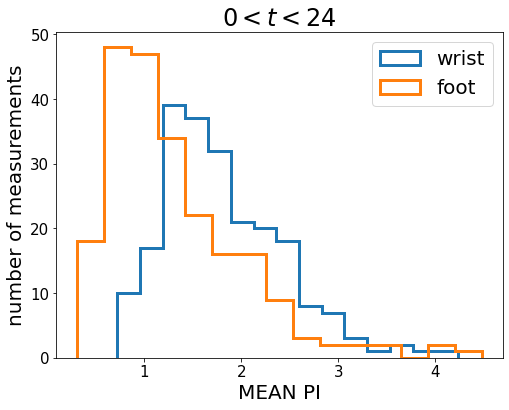

In [96]:
plt.figure(figsize=(8,6))
plt.hist(pi24_w,bins=15,histtype='step',lw=3,label='wrist')
plt.hist(pi24_f,bins=15,histtype='step',lw=3,label='foot')
plt.xlabel('MEAN PI')
plt.ylabel('number of measurements')
plt.title(r'$0<t<24$')
plt.legend()
plt.show()

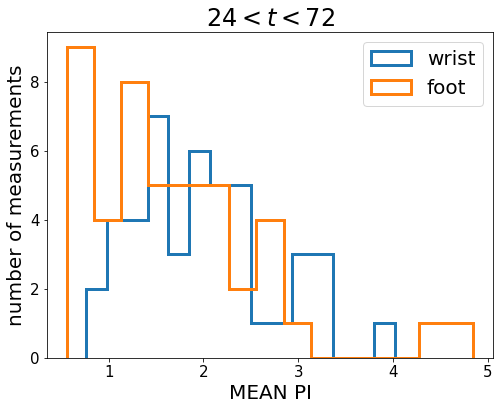

In [97]:
plt.figure(figsize=(8,6))
plt.hist(pi72_w,bins=15,histtype='step',lw=3,label='wrist')
plt.hist(pi72_f,bins=15,histtype='step',lw=3,label='foot')
plt.xlabel('MEAN PI')
plt.ylabel('number of measurements')
plt.title(r'$24<t<72$')
plt.legend()
plt.show()

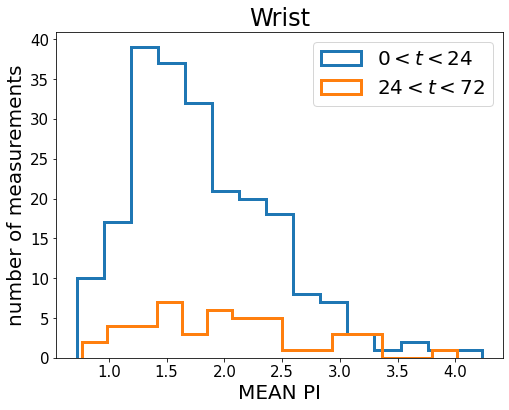

In [98]:
plt.figure(figsize=(8,6))
plt.hist(pi24_w,bins=15,histtype='step',lw=3,label=r'$0<t<24$')
plt.hist(pi72_w,bins=15,histtype='step',lw=3,label=r'$24<t<72$')
plt.xlabel('MEAN PI')
plt.ylabel('number of measurements')
plt.title(r'Wrist')
plt.legend()
plt.show()

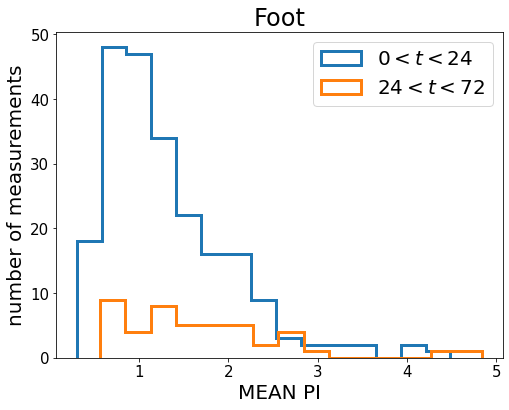

In [99]:
plt.figure(figsize=(8,6))
plt.hist(pi24_f,bins=15,histtype='step',lw=3,label=r'$0<t<24$')
plt.hist(pi72_f,bins=15,histtype='step',lw=3,label=r'$24<t<72$')
plt.xlabel('MEAN PI')
plt.ylabel('number of measurements')
plt.title(r'Foot')
plt.legend()
plt.show()

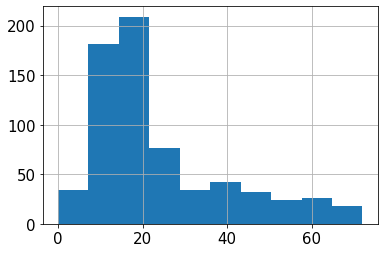

In [100]:
(T['DELTA_SEC_MEASURE']/60./60.).hist(range=(0,72))

In [45]:
len(table_1['BABY_IDS'].unique())

249

In [46]:
len(table_2['BABY_IDS'].unique())

43

In [47]:
len(table_2)

93

In [48]:
len(table_1)

478

# Same analysis for PR

In [112]:
# TOTAL BABIES
table_1 = T[((T['DELTA_SEC_MEASURE']/60./60.)<24.) & (T['PHN']==False)]
table_2 = T[((T['DELTA_SEC_MEASURE']/60./60.)>=24.) & ((T['DELTA_SEC_MEASURE']/60./60.)<72.) & (T['PHN']==False)]
# let's not count babies with null measurements

temp_pr24 = table_1[['MEAN_PR','BABY_IDS']].dropna()  
temp_pr72 = table_2[['MEAN_PR','BABY_IDS']].dropna() 
# The dropna is not changing the number of object because apparently
# where there is no PI measurement from the foot, there is from the wrist
# or later on within the time limit chosen (i.e. < 24 or [24,72])
print('Number of total babies  0 < t < 24 : ',unique_id(temp_pr24)[0])
print('Number of total babies 24 < t < 72 : ',unique_id(temp_pr72)[0])

Number of total babies  0 < t < 24 :  249
Number of total babies 24 < t < 72 :  43


In [111]:
# NO PHN ### WRIST ###
table_1 = T[((T['DELTA_SEC_MEASURE']/60./60.)<24.) & (T['WRIST']==True) & (T['PHN']==False)]
table_2 = T[((T['DELTA_SEC_MEASURE']/60./60.)>=24.) & ((T['DELTA_SEC_MEASURE']/60./60.)<72.) & (T['WRIST']==True) & (T['PHN']==False)]

pr24_w = table_1['MEAN_PR'].dropna()
pr72_w = table_2['MEAN_PR'].dropna()

temp_pr24_w = table_1[['MEAN_PR','BABY_IDS']].dropna() 
temp_pr72_w = table_2[['MEAN_PR','BABY_IDS']].dropna() 


print('##### WRIST #####')
print('Number of objects t<24: ',unique_id(temp_pr24_w)[0] )
print('Mean PR wrist t<24: ',np.mean( pr24_w ) )
print('Number of objects 24<t<72: ',unique_id(temp_pr72_w)[0] )
print('Mean PR wrist 24<t<72: ',np.mean(pr72_w) )
print('Mann-Whitney test 24 vs 72: p-value = %.3f'%ss.mannwhitneyu(pr24_w,pr72_w)[1])
print('Student T-test 24 vs 72:    p-value = %.3f'%ss.ttest_ind(pr24_w,pr72_w)[1])
print('Difference between means: %.3f'%np.abs( np.mean( pr24_w )-np.mean( pr72_w )))

##### WRIST #####
Number of objects t<24:  233
Mean PR wrist t<24:  122.3819932127228
Number of objects 24<t<72:  42
Mean PR wrist 24<t<72:  126.57872731012262
Mann-Whitney test 24 vs 72: p-value = 0.017
Student T-test 24 vs 72:    p-value = 0.015
Difference between means: 4.197


In [113]:
# NO PHN ### FOOT ###
table_1 = T[((T['DELTA_SEC_MEASURE']/60./60.)<24.) & (T['FOOT']==True) & (T['PHN']==False)]
table_2 = T[((T['DELTA_SEC_MEASURE']/60./60.)>=24.) & ((T['DELTA_SEC_MEASURE']/60./60.)<72.) & (T['FOOT']==True) & (T['PHN']==False)]

pr24_f = table_1['MEAN_PR'].dropna()
pr72_f = table_2['MEAN_PR'].dropna()

temp_pr24_f = table_1[['MEAN_PR','BABY_IDS']].dropna() 
temp_pr72_f = table_2[['MEAN_PR','BABY_IDS']].dropna() 

# dropna() act to all the columns, so you can't use the entire table
# but since I know the BABY_IDS is never null, this way it works

print('##### FOOT #####')
#print('Number of objects t<24: ',len(pi24_f) ) # this would count the same baby several times
#print('Number of objects t<24: ',unique_id(table_1.dropna())[0] )
#print('Number of objects t<24: ',unique_id(table_1)[0] ) # this would count the null values as well
print('Number of objects t<24: ',unique_id(temp_pr24_f)[0] )
print('Mean PR foot t<24: ',np.mean( pr24_f ))
#print('Number of objects 24<t<72: ',len(pi72_f) )
print('Number of objects t<24<72: ',unique_id(temp_pr72_f)[0] )
print('Mean PR foot 24<t<72: ',np.mean( pr72_f ))
print('Mann-Whitney test 24 vs 72: p-value = %.4f'%ss.mannwhitneyu(pr24_f,pr72_f)[1])
print('Student T-test 24 vs 72:    p-value = %.4f'%ss.ttest_ind(pr24_f,pr72_f)[1])
print('Difference between means: %.3f'%np.abs( np.mean( pr24_f )-np.mean( pr72_f )))

##### FOOT #####
Number of objects t<24:  245
Mean PR foot t<24:  122.06304290681888
Number of objects t<24<72:  43
Mean PR foot 24<t<72:  129.4504060621604
Mann-Whitney test 24 vs 72: p-value = 0.0004
Student T-test 24 vs 72:    p-value = 0.0002
Difference between means: 7.387


In [116]:
print('#### WRIST MEAN PR PERCENTILES ####')
for q in [5,25,50,75,90,95]:
    print('%2i th percentile t<24: %.1f; 24<t<72: %.1f'%(q,np.percentile(pr24_w,q=q),np.percentile(pr72_w,q=q)))

#### WRIST MEAN PR PERCENTILES ####
 5 th percentile t<24: 106.0; 24<t<72: 111.8
25 th percentile t<24: 115.2; 24<t<72: 117.3
50 th percentile t<24: 121.9; 24<t<72: 124.9
75 th percentile t<24: 128.9; 24<t<72: 135.9
90 th percentile t<24: 135.4; 24<t<72: 140.0
95 th percentile t<24: 142.2; 24<t<72: 142.3


In [117]:
print('#### FOOT MEAN PR PERCENTILES ####')
for q in [5,25,50,75,90,95]:
    print('%2i th percentile t<24: %.1f; 24<t<72: %.1f'%(q,np.percentile(pr24_f,q=q),np.percentile(pr72_f,q=q)))

#### FOOT MEAN PR PERCENTILES ####
 5 th percentile t<24: 104.3; 24<t<72: 109.7
25 th percentile t<24: 113.7; 24<t<72: 117.3
50 th percentile t<24: 121.5; 24<t<72: 131.4
75 th percentile t<24: 129.4; 24<t<72: 139.0
90 th percentile t<24: 137.1; 24<t<72: 145.6
95 th percentile t<24: 143.0; 24<t<72: 152.0


In [120]:
print('CHECKING STATISTICAL DIFFERENCE \nWRIST vs FOOT (p-value)')
print('-----------------------------------')
print('Mann-Whitney test t<24: %.3f'%ss.mannwhitneyu(pr24_w,pr24_f)[1])
print('Mann-Whitney test 24<t<72: %.3f'%ss.mannwhitneyu(pr72_w,pr72_f)[1])
print('-----------------------------------')
print('Student T-test t<24:    %.3f'%ss.ttest_ind(pr24_w,pr24_f)[1])
print('Student T-test 24<t<72:    %.3f'%ss.ttest_ind(pr72_w,pr72_f)[1])
print('-----------------------------------')
print('Difference between means t<24: %.3f'%np.abs(np.mean(pr24_w)-np.mean(pr24_f)))
print('Difference between means 24<t<72: %.3f'%np.abs(np.mean(pr72_w)-np.mean(pr72_f)))

CHECKING STATISTICAL DIFFERENCE 
WRIST vs FOOT (p-value)
-----------------------------------
Mann-Whitney test t<24: 0.290
Mann-Whitney test 24<t<72: 0.167
-----------------------------------
Student T-test t<24:    0.756
Student T-test 24<t<72:    0.300
-----------------------------------
Difference between means t<24: 0.319
Difference between means 24<t<72: 2.872


# Tests

In [49]:
#sanity check (every baby have a measurement,either from the wrist or the food or both)
all_babies = T[(T['WRIST']==True)|(T['FOOT']==True)]

In [50]:
unique_id(all_babies)

(268, 1.0)

In [51]:
# ALL WRIST (NO PHN)
wrist = T[(T['WRIST']==True)& (T['PHN']==False)]
unique_id(wrist)

(252, 0.9402985074626866)

In [52]:
# ALL FOOT (NO PHN)
foot = T[(T['FOOT']==True)& (T['PHN']==False)]
unique_id(foot)

(263, 0.9813432835820896)

# Using directly a loop on baby objects if the properties are not in the text file

In [53]:
b = baby('FMC003')

### Ethnicity

In [121]:
# id is a builtin function, don't overwrite it!!
help(id)
print('This is the memory address of the variable b: ',id(b))

Help on built-in function id in module builtins:

id(obj, /)
    Return the identity of an object.
    
    This is guaranteed to be unique among simultaneously existing objects.
    (CPython uses the object's memory address.)

This is the memory address of the variable b:  140428568770992


In [122]:
# I DID THIS BEFORE INCLUDING THE ETHNICITY IN THE TABLE OF AVERAGE PROPERTIES
# NOW I CAN SIMPLY USE A SELECTION ON THAT TABLE

quantity = []
for iid in np.unique(T['BABY_IDS']):
    b = baby(iid)
    #print(iid, ': mean PR = ',b.measurements[0]['PR'].mean())
    #print(iid, ': weight [grams] = ',b.weight_grams)
    quantity.append(b.ethnicity)
quantity = np.array(quantity)

In [123]:
np.unique(quantity)

array(['African-American', 'East Indian', 'Hispanic', 'Native',
       'Oriental', 'Others', 'Unknown', 'White'], dtype='<U16')

In [124]:
print('African-American','\t',len(np.where(quantity=='African-American')[0])  ,round(len(np.where(quantity=='African-American')[0])/268.*100.,2))
print('East Indian'     ,'\t\t',len(np.where(quantity=='East Indian')[0])     ,round(len(np.where(quantity=='East Indian')[0])     /268.*100.,2))
print('Hispanic'        ,'\t\t',len(np.where(quantity=='Hispanic')[0])        ,round(len(np.where(quantity=='Hispanic')[0])        /268.*100.,2))
print('Native'          ,'\t\t\t',len(np.where(quantity=='Native')[0])        ,round(len(np.where(quantity=='Native')[0])          /268.*100.,2))
print('Oriental'        ,'\t\t',len(np.where(quantity=='Oriental')[0])        ,round(len(np.where(quantity=='Oriental')[0])        /268.*100.,2))
print('Others'          ,'\t\t\t',len(np.where(quantity=='Others')[0])        ,round(len(np.where(quantity=='Others')[0])          /268.*100.,2))
print('Unknown'         ,'\t\t',len(np.where(quantity=='Unknown')[0])         ,round(len(np.where(quantity=='Unknown')[0])         /268.*100.,2))
print('White'           ,'\t\t\t',len(np.where(quantity=='White')[0])         ,round(len(np.where(quantity=='White')[0])           /268.*100.,2))

African-American 	 12 4.48
East Indian 		 31 11.57
Hispanic 		 15 5.6
Native 			 3 1.12
Oriental 		 27 10.07
Others 			 17 6.34
Unknown 		 2 0.75
White 			 161 60.07


In [178]:
races = T['ETHNICITY'].unique()

In [183]:
print('################# STUDY OF PR ######################')
for race in races:
    print('#### %s #### < 24 hours'%race)
    pr_race_24 = T['MEAN_PR'][(T['ETHNICITY']==race)&(T['PHN']==False)&(T['DELTA_SEC_MEASURE']/60./60.<24.)]
    print('mean PR = %.2f'%np.mean(pr_race_24))
    print('std PR = %.2f'%np.std(pr_race_24))

    print('\n')

################# STUDY OF PR ######################
#### White #### < 24 hours
mean PR = 121.43
std PR = 11.03


#### Others #### < 24 hours
mean PR = 125.37
std PR = 10.63


#### East Indian #### < 24 hours
mean PR = 122.66
std PR = 11.54


#### Oriental #### < 24 hours
mean PR = 120.91
std PR = 10.15


#### African-American #### < 24 hours
mean PR = 125.48
std PR = 15.48


#### Native #### < 24 hours
mean PR = 122.54
std PR = 1.67


#### Hispanic #### < 24 hours
mean PR = 124.94
std PR = 11.02


#### Unknown #### < 24 hours
mean PR = 132.82
std PR = 9.11




In [184]:
print('################# STUDY OF PR ######################')
for race in races:
    print('#### %s #### >= 24 hours'%race)
    pr_race_24 = T['MEAN_PR'][(T['ETHNICITY']==race)&(T['PHN']==False)&(T['DELTA_SEC_MEASURE']/60./60.>=24.)]
    print('mean PR = %.2f'%np.mean(pr_race_24))
    print('std PR = %.2f'%np.std(pr_race_24))

    print('\n')

################# STUDY OF PR ######################
#### White #### >= 24 hours
mean PR = 128.67
std PR = 13.25


#### Others #### >= 24 hours
mean PR = 128.29
std PR = 3.79


#### East Indian #### >= 24 hours
mean PR = 124.90
std PR = 15.58


#### Oriental #### >= 24 hours
mean PR = 131.72
std PR = 11.37


#### African-American #### >= 24 hours
mean PR = 128.13
std PR = 7.32


#### Native #### >= 24 hours
mean PR = nan
std PR = nan


#### Hispanic #### >= 24 hours
mean PR = 130.92
std PR = 7.94


#### Unknown #### >= 24 hours
mean PR = nan
std PR = nan




In [185]:
print('################# STUDY OF SpO2 ######################')
for race in races:
    print('#### %s #### < 24 hours'%race)
    spo2_race_24 = T['MEAN_SPO2'][(T['ETHNICITY']==race)&(T['PHN']==False)&(T['DELTA_SEC_MEASURE']/60./60.<24.)]
    print('mean PR = %.2f'%np.mean(spo2_race_24))
    print('std PR = %.2f'%np.std(spo2_race_24))

    print('\n')

################# STUDY OF SpO2 ######################
#### White #### < 24 hours
mean PR = 95.57
std PR = 2.63


#### Others #### < 24 hours
mean PR = 96.33
std PR = 3.25


#### East Indian #### < 24 hours
mean PR = 97.14
std PR = 2.44


#### Oriental #### < 24 hours
mean PR = 95.39
std PR = 3.10


#### African-American #### < 24 hours
mean PR = 95.58
std PR = 3.34


#### Native #### < 24 hours
mean PR = 92.83
std PR = 3.71


#### Hispanic #### < 24 hours
mean PR = 95.28
std PR = 3.51


#### Unknown #### < 24 hours
mean PR = 97.24
std PR = 1.19




In [186]:
print('################# STUDY OF SpO2 ######################')
for race in races:
    print('#### %s #### >= 24 hours'%race)
    spo2_race_24 = T['MEAN_SPO2'][(T['ETHNICITY']==race)&(T['PHN']==False)&(T['DELTA_SEC_MEASURE']/60./60.>=24.)]
    print('mean PR = %.2f'%np.mean(spo2_race_24))
    print('std PR = %.2f'%np.std(spo2_race_24))
    print('\n')

################# STUDY OF SpO2 ######################
#### White #### >= 24 hours
mean PR = 96.06
std PR = 3.04


#### Others #### >= 24 hours
mean PR = 97.40
std PR = 1.14


#### East Indian #### >= 24 hours
mean PR = 96.19
std PR = 2.48


#### Oriental #### >= 24 hours
mean PR = 95.63
std PR = 2.13


#### African-American #### >= 24 hours
mean PR = 96.39
std PR = 1.52


#### Native #### >= 24 hours
mean PR = nan
std PR = nan


#### Hispanic #### >= 24 hours
mean PR = 96.64
std PR = 1.96


#### Unknown #### >= 24 hours
mean PR = nan
std PR = nan




In [ ]:
AGE = []
ids = np.unique(T['BABY_IDS'])
for id in ids:
    b = baby(id)
    AGE.append(b.age_mum)
AGE = np.array(AGE)

In [ ]:
for i in range(len(ids)):
    print(ids[i],AGE[i])

In [ ]:
AGE.mean()

In [ ]:
DIABETES = []
ids = np.unique(T['BABY_IDS'])
for id in ids:
    b = baby(id)
    DIABETES.append(b.gestational_diabetes)
DIABETES = np.array(DIABETES)

In [ ]:
np.unique(DIABETES)

In [ ]:
print('BABIES WITH GESTATIONAL DIABETES: # = %s perc = %s'%(len(np.where(DIABETES=='Yes')[0]),len(np.where(DIABETES=='Yes')[0])/268.*100))

In [ ]:
SMOKING = []
ids = np.unique(T['BABY_IDS'])
for id in ids:
    b = baby(id)
    SMOKING.append(b.smoking)
SMOKING = np.array(SMOKING)

In [ ]:
np.unique(SMOKING)

In [ ]:
print('SMOKING MUMS: # = %s perc = %s'%(len(np.where(SMOKING=='Yes')[0]),len(np.where(SMOKING=='Yes')[0])/268.*100))

In [ ]:
MECONIUM = []
ids = np.unique(T['BABY_IDS'])
for id in ids:
    b = baby(id)
    MECONIUM.append(b.meconium)
MECONIUM = np.array(MECONIUM)

In [ ]:
np.unique(MECONIUM)

In [ ]:
print('Babies with meconium stained liqor: # = %s perc = %s'%(len(np.where(MECONIUM=='Yes')[0]),len(np.where(MECONIUM=='Yes')[0])/268.*100))

In [ ]:
APGAR5 = []
ids = np.unique(T['BABY_IDS'])
for id in ids:
    b = baby(id)
    APGAR5.append(b.apgar5)
APGAR5 = np.array(APGAR5)

In [ ]:
np.mean(APGAR5),np.std(APGAR5)

In [ ]:
APGAR5

In [ ]:
ss.iqr(APGAR5,rng=(0,100))

In [ ]:
#MATERNAL PRE-ECLAMPSIA
PRE_ECLAMPSIA = []
ids = np.unique(T['BABY_IDS'])
for iid in ids:
    b = baby(iid)
    PRE_ECLAMPSIA.append(b.preeclampsia)
PRE_ECLAMPSIA = np.array(PRE_ECLAMPSIA)

In [ ]:
np.unique(PRE_ECLAMPSIA)

In [ ]:
print('Babies with maternal pre-eclampsia: # = %s perc = %s'%(len(np.where(PRE_ECLAMPSIA=='Yes')[0]),len(np.where(PRE_ECLAMPSIA=='Yes')[0])/268.*100))

In [ ]:
AGE_FIRST_REC = []
ids = np.unique(T['BABY_IDS'])
for id in ids:
    b = baby(id)
    AGE_FIRST_REC.append(np.min(b.measurements_delta_sec_since_birth))
AGE_FIRST_REC = np.array(AGE_FIRST_REC)

In [ ]:
np.min(b.measurements_delta_sec_since_birth)

In [ ]:
np.median(AGE_FIRST_REC)/60./60.

In [ ]:
ss.iqr(AGE_FIRST_REC,rng=(25,75))/60./60.

In [ ]:
age_sort = np.sort(AGE_FIRST_REC)

In [ ]:
print(np.median(AGE_FIRST_REC))

In [ ]:
def my_median(vector):
    vec_sorted = np.sort(vector)
    dispari = np.mod(len(vec_sorted),2)
    index = int(len(vec_sorted)/2.)
    if dispari:
        med = vec_sorted[index]
    else:
        m1 = vec_sorted[index-1]
        m2 = vec_sorted[index]
        med = (m1 + m2)/2.
    return med

In [ ]:
def percentile(vector,perc=25):
    vec_sorted = np.sort(vector)
    frac = perc/100.
    return vec_sorted[int(round(len(vec_sorted)*frac,0))]

In [ ]:
my_median(AGE_FIRST_REC)

In [ ]:
p1 = percentile(AGE_FIRST_REC,perc=25)

In [ ]:
p2 = percentile(AGE_FIRST_REC,perc=75)

In [ ]:
np.absolute(p1-p2)#/60./60.

In [ ]:
ss.iqr(AGE_FIRST_REC)

# Counting the number of measurements per baby

In [ ]:
#Number of files per baby
num_recordings = []
num_wrist = []
num_foot = []
ids = np.unique(T['BABY_IDS'])
for iid in ids:
    b = baby(iid)
    num_recordings.append(len(b.files))
    num_wrist.append(len(np.where(b.measurements_wrist==True)[0]))
    num_foot.append(len(np.where(b.measurements_foot==True)[0]))
num_recordings = np.array(num_recordings)

In [ ]:
num_wrist = np.array(num_wrist)
num_foot = np.array(num_foot)

In [ ]:
plt.hist(num_recordings)
plt.xlabel('Number of recordings')
plt.ylabel('Number of babies')
plt.show()

In [ ]:
plt.hist(num_wrist)
plt.xlabel('Number of recordings from wrist')
plt.ylabel('Number of babies')
plt.show()

In [ ]:
plt.hist(num_foot)
plt.xlabel('Number of recordings from foot')
plt.ylabel('Number of babies')
plt.show()

In [ ]:
print('Babies with 0 recordings: %i'%len(np.where(num_recordings==0)[0]))
print('Babies with 1 recording : %i'%len(np.where(num_recordings==1)[0]))
print('Babies with 2 recordings: %i'%len(np.where(num_recordings==2)[0]))
print('Babies with 3 recordings: %i'%len(np.where(num_recordings==3)[0]))
print('Babies with 4 recordings: %i'%len(np.where(num_recordings==4)[0]))
print('Babies with 5 recordings: %i'%len(np.where(num_recordings==5)[0]))
print('Babies with 6 recordings: %i'%len(np.where(num_recordings==6)[0]))
print('Babies with 7 recordings: %i'%len(np.where(num_recordings==7)[0]))

In [ ]:
print('Babies with 0 recordings from wrist: %i'%len(np.where(num_wrist==0)[0]))
print('Babies with 1 recording  from wrist: %i'%len(np.where(num_wrist==1)[0]))
print('Babies with 2 recordings from wrist: %i'%len(np.where(num_wrist==2)[0]))
print('Babies with 3 recordings from wrist: %i'%len(np.where(num_wrist==3)[0]))
print('Babies with 4 recordings from wrist: %i'%len(np.where(num_wrist==4)[0]))
#print('Babies with 5 recordings from wrist: %i'%len(np.where(num_wrist==5)[0]))
#print('Babies with 6 recordings from wrist: %i'%len(np.where(num_wrist==6)[0]))
#print('Babies with 7 recordings from wrist: %i'%len(np.where(num_wrist==7)[0]))

In [ ]:
print('Babies with 0 recordings from foot: %i'%len(np.where(num_foot==0)[0]))
print('Babies with 1 recording  from foot: %i'%len(np.where(num_foot==1)[0]))
print('Babies with 2 recordings from foot: %i'%len(np.where(num_foot==2)[0]))
print('Babies with 3 recordings from foot: %i'%len(np.where(num_foot==3)[0]))
print('Babies with 4 recordings from foot: %i'%len(np.where(num_foot==4)[0]))
#print('Babies with 5 recordings from foot: %i'%len(np.where(num_foot==5)[0]))
#print('Babies with 6 recordings from foot: %i'%len(np.where(num_foot==6)[0]))
#print('Babies with 7 recordings from foot: %i'%len(np.where(num_foot==7)[0]))

# Percentiles of PR total (not splitted in time slots)

In [101]:
print('PR 5th percentile %.1f '%          np.percentile(np.array(T['MED_PR'][T['PHN']==False]),5))
print('PR 25th percentile %.1f '%         np.percentile(np.array(T['MED_PR'][T['PHN']==False]),25))
print('PR 50th percentile %.1f (median)'% np.percentile(np.array(T['MED_PR'][T['PHN']==False]),50))
print('PR 75th percentile %.1f '%         np.percentile(np.array(T['MED_PR'][T['PHN']==False]),75))
print('PR 90th percentile %.1f '%         np.percentile(np.array(T['MED_PR'][T['PHN']==False]),90))
print('PR 95th percentile %.1f '%         np.percentile(np.array(T['MED_PR'][T['PHN']==False]),95))

PR 5th percentile 103.5 
PR 25th percentile 114.0 
PR 50th percentile 122.0 (median)
PR 75th percentile 130.0 
PR 90th percentile 138.0 
PR 95th percentile 143.0 


In [102]:
print('PR WRIST 5th percentile %.1f '%          np.percentile(np.array(T['MED_PR'][(T['PHN']==False)&(T['WRIST']==True)]),5))
print('PR WRIST 25th percentile %.1f '%         np.percentile(np.array(T['MED_PR'][(T['PHN']==False)&(T['WRIST']==True)]),25))
print('PR WRIST 50th percentile %.1f (median)'% np.percentile(np.array(T['MED_PR'][(T['PHN']==False)&(T['WRIST']==True)]),50))
print('PR WRIST 75th percentile %.1f '%         np.percentile(np.array(T['MED_PR'][(T['PHN']==False)&(T['WRIST']==True)]),75))
print('PR WRIST 90th percentile %.1f '%         np.percentile(np.array(T['MED_PR'][(T['PHN']==False)&(T['WRIST']==True)]),90))
print('PR WRIST 95th percentile %.1f '%         np.percentile(np.array(T['MED_PR'][(T['PHN']==False)&(T['WRIST']==True)]),95))

PR WRIST 5th percentile 104.9 
PR WRIST 25th percentile 115.0 
PR WRIST 50th percentile 121.0 (median)
PR WRIST 75th percentile 129.0 
PR WRIST 90th percentile 136.2 
PR WRIST 95th percentile 142.0 


In [103]:
print('PR FOOT 5th percentile %.1f '%          np.percentile(np.array(T['MED_PR'][(T['PHN']==False)&(T['FOOT']==True)]),5))
print('PR FOOT 25th percentile %.1f '%         np.percentile(np.array(T['MED_PR'][(T['PHN']==False)&(T['FOOT']==True)]),25))
print('PR FOOT 50th percentile %.1f (median)'% np.percentile(np.array(T['MED_PR'][(T['PHN']==False)&(T['FOOT']==True)]),50))
print('PR FOOT 75th percentile %.1f '%         np.percentile(np.array(T['MED_PR'][(T['PHN']==False)&(T['FOOT']==True)]),75))
print('PR FOOT 90th percentile %.1f '%         np.percentile(np.array(T['MED_PR'][(T['PHN']==False)&(T['FOOT']==True)]),90))
print('PR FOOT 95th percentile %.1f '%         np.percentile(np.array(T['MED_PR'][(T['PHN']==False)&(T['FOOT']==True)]),95))

PR FOOT 5th percentile 103.0 
PR FOOT 25th percentile 114.0 
PR FOOT 50th percentile 122.0 (median)
PR FOOT 75th percentile 131.0 
PR FOOT 90th percentile 139.0 
PR FOOT 95th percentile 144.2 
